<a href="https://colab.research.google.com/github/RomanKunal/Deep-Learning/blob/main/EMOTIONS_DETECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the datset

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d msambare/fer2013
!unzip fer2013.zip -d ./fer2013_dataset


Streaming output truncated to the last 5000 lines.
  inflating: ./fer2013_dataset/train/sad/Training_65242339.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65267116.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65275626.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_6529266.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65329617.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65338712.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65338797.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65387162.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65404494.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65426218.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65430136.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65437377.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_6545735.jpg  
  inflating: ./fer2013_dataset/train/sad/Training_65463385.jpg  
  inflating: ./fer2013_dataset/train/sad/

In [3]:
import os
import zipfile
path="./fer2013.zip"
# Unzipping the dataset
with zipfile.ZipFile(path, 'r') as zip_ref:
    extract_path = "./fer2013"
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: ./fer2013


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential

In [5]:
IMG_HEIGHT=48
IMG_WIDTH=48
batch_size=32


In [6]:
train_data="/content/fer2013_dataset/train"
validation_data="/content/fer2013_dataset/test"

In [7]:
train_data_gen=ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_data_gen=ImageDataGenerator(rescale=1/255.0
)

In [8]:
train_gen=train_data_gen.flow_from_directory(
    train_data,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_gen=validation_data_gen.flow_from_directory(
    validation_data,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
class_labels=train_gen.class_indices
class_labels={v:k for k,v in class_labels.items()}
class_labels

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

sad


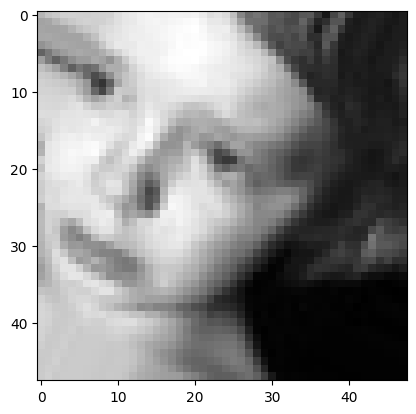

In [10]:
image,label=train_gen.__next__()
import random
i=random.randint(0,(image.shape[0])-1)
img=image[i]
lab=label[i]
plt.imshow(img[:,:,0],cmap='gray')
print(class_labels[np.argmax(lab)])

In [12]:
from tensorflow.keras import layers, models


# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 classes for emotions
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 913,159 (3.48 MB)

 Trainable params: 913,159 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:

from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor='loss',  # Metric to monitor
    min_delta=0.0001,              # Minimum improvement to qualify as progress
    patience=20,                   # Wait for 20 epochs of no improvement before stopping
    verbose=1,                     # Display a message when training stops
    mode='auto',                   # Determine whether to minimize or maximize the monitored metric
    baseline=None,                 # No predefined threshold; use the best value observed
    restore_best_weights=False     # Do not restore weights from the best epoch
)

In [15]:
history = model.fit(
    train_gen,
    validation_data=validation_gen,
    epochs=100,  # Adjust epochs based on dataset size and convergence
    steps_per_epoch=len(train_gen),
    validation_steps=len(validation_gen),
    callbacks=[callback]
)


Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.4586 - loss: 1.4231 - val_accuracy: 0.5305 - val_loss: 1.2172
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.4586 - loss: 1.4080 - val_accuracy: 0.5361 - val_loss: 1.2118
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.4619 - loss: 1.3956 - val_accuracy: 0.5430 - val_loss: 1.1997
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.4698 - loss: 1.3869 - val_accuracy: 0.5497 - val_loss: 1.1998
Epoch 8/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.4717 - loss: 1.3715 - 

In [16]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.2f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.2f}")


Final Training Accuracy: 0.00
Final Validation Accuracy: 0.56


In [19]:
test_loss, test_acc = model.evaluate(validation_gen)  # Assuming `test_gen` is defined
print(f"Test Accuracy: {test_acc:.2f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5691 - loss: 1.1407
Test Accuracy: 0.56


In [24]:
model.save("emotion_detection_model.h5")


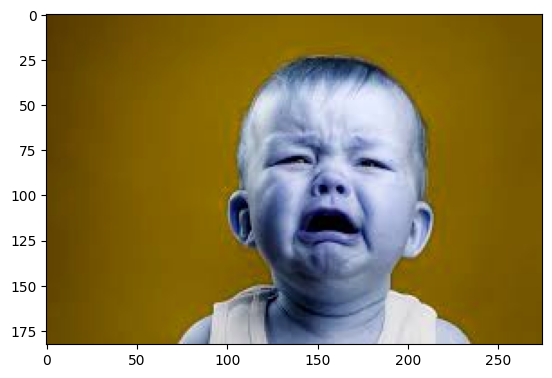

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("/content/images (3).jpeg")
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


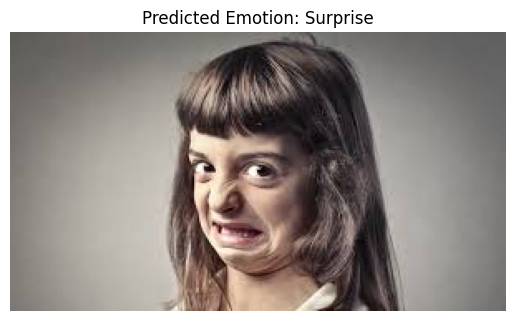

Predicted Emotion: Surprise


In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("emotion_detection_model.h5")

# Define the emotion labels (ensure they match your training dataset)
class_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# Load and preprocess the image
img = cv2.imread("/content/images (4).jpeg")

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize the image to (48, 48) - the input size of the model
resized_img = cv2.resize(gray_img, (48, 48))

# Normalize the image
normalized_img = resized_img / 255.0

# Add batch and channel dimensions
input_img = np.expand_dims(normalized_img, axis=0)  # Add batch dimension
input_img = np.expand_dims(input_img, axis=-1)  # Add channel dimension (grayscale)

# Predict emotion
predictions = model.predict(input_img)
predicted_class_idx = np.argmax(predictions)

# Map index to emotion label
predicted_emotion = class_labels[predicted_class_idx]

# Display the original image with the predicted emotion
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off')
plt.show()

print(f"Predicted Emotion: {predicted_emotion}")
